In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
iris.keys()

data = iris['data'][:, 2:]
targets = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(data, targets)

DecisionTreeClassifier(max_depth=2)

In [16]:
# vicsualise data

from sklearn.tree import export_graphviz

with open("/Users/co059/Desktop/files/datascience/projects/miscellaneous/iris_tree.png", 'w') as f:
    export_graphviz(
        tree_clf,
        out_file=f,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
     )

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

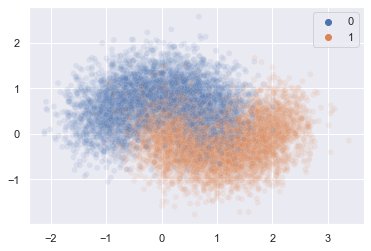

In [21]:
# practice on moons dataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_moons

data = make_moons(n_samples=10000, noise=0.4)

sns.scatterplot(data[0][:,0], data[0][:,1], hue = data[1], alpha = 0.1)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size = 0.2)

tree_clf = DecisionTreeClassifier(random_state = 42)

params = [{'max_depth': [2, 3, 5, 10, 20],
        'min_samples_split': [2, 10, 50],
        'min_samples_leaf':[2, 10, 50],
        'max_features':[None, 'auto'],
        'max_leaf_nodes':[5, 10, 20, 50, 100, None]}]

tree_clf_opt = GridSearchCV(tree_clf, param_grid = params, cv =5)

tree_clf_opt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [2, 3, 5, 10, 20],
                          'max_features': [None, 'auto'],
                          'max_leaf_nodes': [5, 10, 20, 50, 100, None],
                          'min_samples_leaf': [2, 10, 50],
                          'min_samples_split': [2, 10, 50]}])

In [29]:
tree_clf_opt.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_samples_leaf=50,
                       random_state=42)

In [30]:
tree_opti = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_samples_leaf=50,
                       random_state=42)

tree_opti.fit(X_train, y_train)

y_pred = tree_opti.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc

0.8635

In [31]:
X_train.shape

(8000, 2)

In [45]:
# grow a forest and compare scores
from sklearn.model_selection import ShuffleSplit


rs = ShuffleSplit(n_splits=1000, test_size=len(X_train)-100, random_state=0)

miniSets = []

for train_index, test_index in rs.split(X_train):
    X_mini_train = X_train[train_index]
    y_mini_train = y_train[train_index]
    miniSets.append((X_mini_train, y_mini_train))
    
    

In [49]:
from sklearn.base import clone
import numpy as np

models = [clone(tree_clf_opt.best_estimator_) for _ in range(1000)]

acc_scores = []

for model, (x_set, y_set) in zip(models, miniSets):
    model.fit(x_set, y_set)
    y_pred = model.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(acc_scores)

0.7659235

In [51]:
pred_matrix = np.zeros([1000, len(X_test)], dtype=np.uint8)

for index, model in enumerate(models):
    pred_matrix[index] = model.predict(X_test)
    
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(pred_matrix, axis=0)

accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.782